# Next two cells are hidden, due to personal data

In [1]:
# The code was removed by Watson Studio for sharing.

# Note that Folium maps are not rendered on Github. In order to see them, please copy the link of this notebook. Visit: http://nbviewer.org/ and paste there copied url.



# Importing crime data for London

https://www.kaggle.com/jboysen/london-crime#london_crime_by_lsoa.csv

In [2]:
# The code was removed by Watson Studio for sharing.

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
df=df_data_0.dropna(subset=["borough"])

In [4]:
df_sort=df.groupby("borough")[["value"]].count()

In [5]:
# find the most safe boroughs
df_sort = df_sort.sort_values(["value"], ascending = True)
df_sort.head()

,value
borough,
City of London,9720
Kingston upon Thames,259524
Kensington and Chelsea,296784
Richmond upon Thames,304128
Barking and Dagenham,311040


In [6]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

In [7]:
df_plot=df_sort.head()
df_plot.head()

,value
borough,
City of London,9720
Kingston upon Thames,259524
Kensington and Chelsea,296784
Richmond upon Thames,304128
Barking and Dagenham,311040


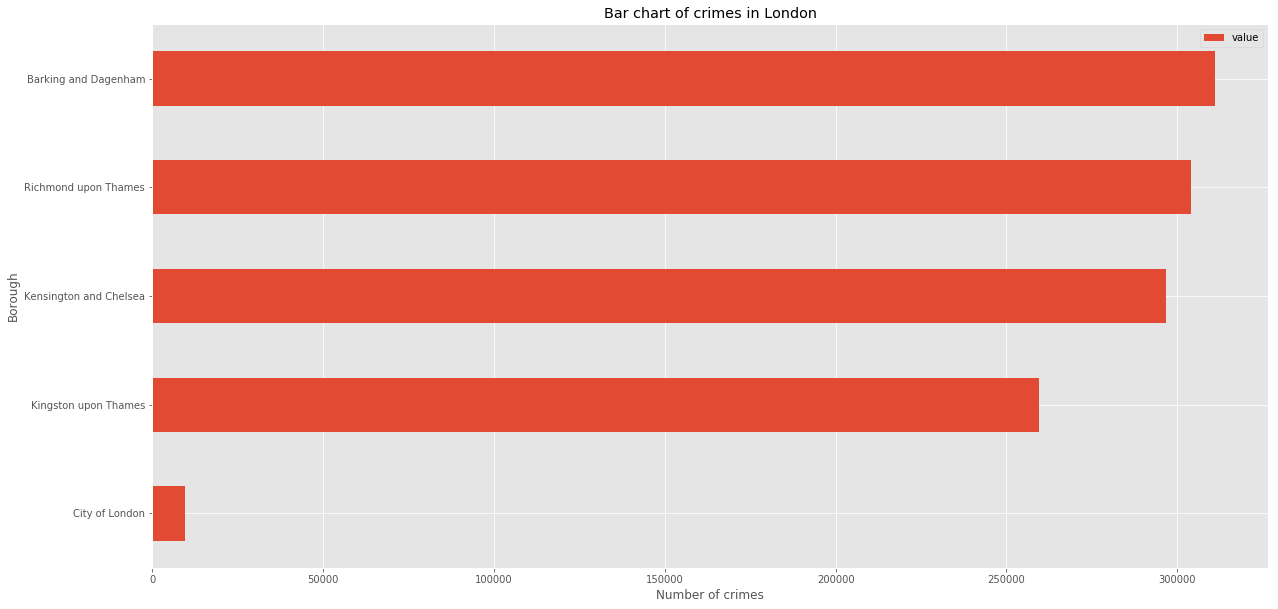

In [8]:
# displays graphically obtained data

df_plot.plot(kind='barh', figsize=(20, 10))

plt.title('Bar chart of crimes in London') # add a title to the histogram
plt.xlabel('Number of crimes') # add x-label
plt.ylabel('Borough') # add y-label

plt.show()

In [9]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                       

In [10]:
df_plot

,value
borough,
City of London,9720
Kingston upon Thames,259524
Kensington and Chelsea,296784
Richmond upon Thames,304128
Barking and Dagenham,311040


In [11]:
# determine latitude and longitude for selected data

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="ny_explorer")

address = 'City of London'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of City of London are {}, {}.'.format(latitude, longitude))
address = 'Kingston upon Thames'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Kingston upon Thames are {}, {}.'.format(latitude, longitude))
address = 'Kensington and Chelsea'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Kensington and Chelsea are {}, {}.'.format(latitude, longitude))
address = 'Richmond upon Thames'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Richmond upon Thames are {}, {}.'.format(latitude, longitude))
address = 'Barking and Dagenham'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Barking and Dagenham are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of City of London are 51.5156177, -0.0919983.
The geograpical coordinate of Kingston upon Thames are 51.4096275, -0.3062621.
The geograpical coordinate of Kensington and Chelsea are 51.4875417, -0.1682205.
The geograpical coordinate of Richmond upon Thames are 51.44046095, -0.3055192359117199.
The geograpical coordinate of Barking and Dagenham are 51.5541171, 0.15050434261994267.


In [12]:
df_plot["latitude"]=[51.5156177,51.4096275,51.4875417,51.44046095,51.5541171]
df_plot["longitude"]=[-0.0919983,-0.3062621,-0.1682205,-0.3055192359117199,0.15050434261994267]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
df_plot.reset_index(inplace=True)
df_plot

,borough,value,latitude,longitude
0,City of London,9720,51.515618,-0.091998
1,Kingston upon Thames,259524,51.409627,-0.306262
2,Kensington and Chelsea,296784,51.487542,-0.168220
3,Richmond upon Thames,304128,51.440461,-0.305519
4,Barking and Dagenham,311040,51.554117,0.150504


In [14]:
from IPython.core.display import HTML
# create a plain London map
london_map = folium.Map(location=[51.5156177, -0.0919983], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_plot['latitude'], df_plot['longitude'], df_plot['borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(london_map)  
    
HTML(london_map._repr_html_())
#london_map

# Note that Folium maps are not rendered on Github. In order to see them, please copy the link of this notebook. Visit: http://nbviewer.org/ and paste there copied url.


In [15]:
# The code was removed by Watson Studio for sharing.

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
LIMIT = 100
radius = 2000
london_venues = getNearbyVenues(names=df_plot['borough'],latitudes=df_plot['latitude'],longitudes=df_plot['longitude'])

City of London
Kingston upon Thames
Kensington and Chelsea
Richmond upon Thames
Barking and Dagenham


In [18]:
# show venues in selected borougs
london_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,City of London,51.515618,-0.091998,Goodman Steak House Restaurant,51.514398,-0.090745,Steakhouse
1,City of London,51.515618,-0.091998,The Ned Hotel,51.513755,-0.090067,Hotel
2,City of London,51.515618,-0.091998,The Merchant House,51.513264,-0.093039,Cocktail Bar
3,City of London,51.515618,-0.091998,Hawksmoor Guildhall,51.515498,-0.090849,Steakhouse
4,City of London,51.515618,-0.091998,City Càphê,51.514750,-0.091545,Vietnamese Restaurant


In [19]:
# select all types of restaurants
rest_data = london_venues[london_venues['Venue Category'].str.contains("Restaurant")].reset_index(drop=True)
rest_data.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,City of London,51.515618,-0.091998,City Càphê,51.514750,-0.091545,Vietnamese Restaurant
1,City of London,51.515618,-0.091998,The Trading House,51.515063,-0.091427,Modern European Restaurant
2,City of London,51.515618,-0.091998,Manicomio,51.515369,-0.095414,Italian Restaurant
3,City of London,51.515618,-0.091998,Malibu Kitchen,51.513511,-0.090074,New American Restaurant
4,City of London,51.515618,-0.091998,Burger & Lobster,51.513687,-0.094643,Seafood Restaurant


In [20]:
# determine the number of restaurants per borough
freq=rest_data.groupby("Neighborhood")["Venue Category"].count()
freq=freq.transpose()

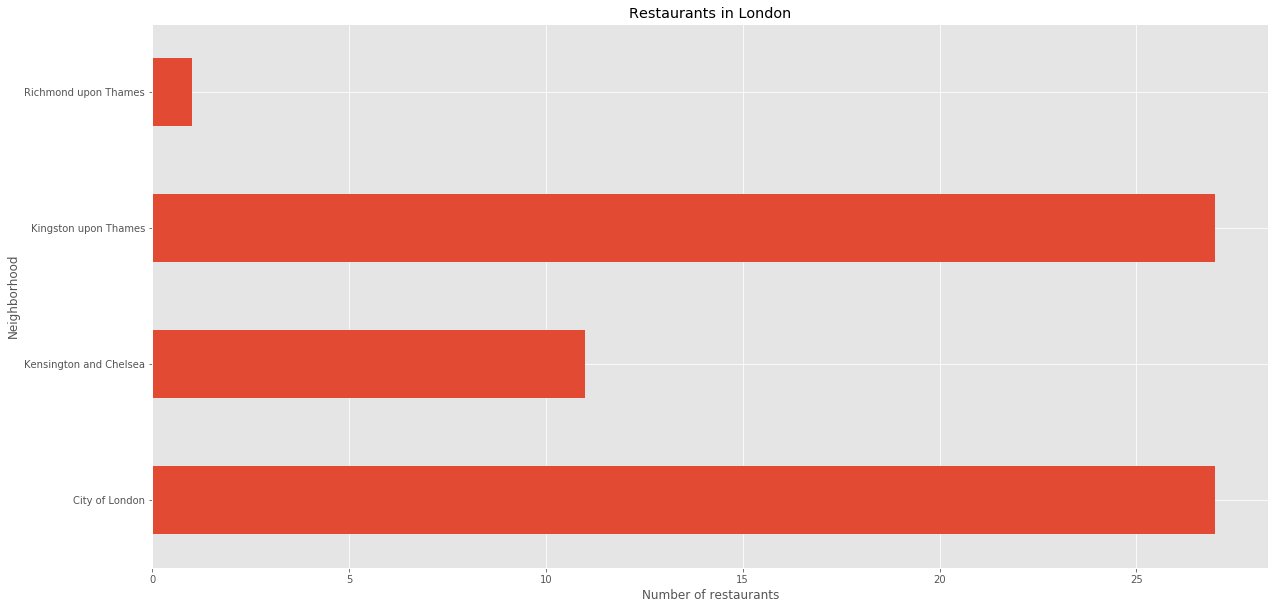

In [21]:
# visualise data
freq.plot(kind='barh', figsize=(20, 10))
#bars=freq["Neighborhood"]
plt.title('Restaurants in London') # add a title to the histogram
plt.xlabel('Number of restaurants') # add x-label
plt.ylabel('Neighborhood') # add y-label
#plt.xticks(freq["Venue Category"], bars)
plt.show()

In [28]:
# let's concentrate only on the safest borough
CL=rest_data[rest_data.Neighborhood=="City of London"]
#KC=rest_data[rest_data.Neighborhood=="Kensington and Chelsea"]
#KT=rest_data[rest_data.Neighborhood=="Kingston upon Thames"]

In [29]:
# determine data
rest_types=CL.groupby("Venue Category")["Venue"].count()
rest_types.columns=["Venue Category","Number"]

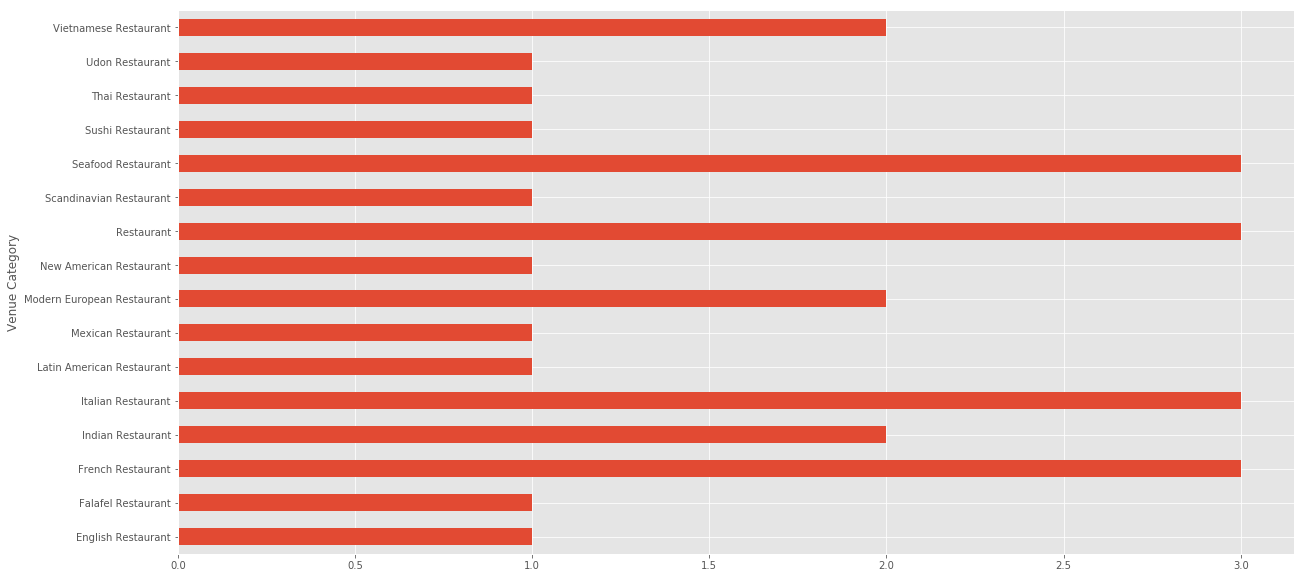

In [30]:
# visualise all types of restaurants in the City of London
rest_types.plot(kind='barh', figsize=(20, 10))
plt.show()

In [31]:
# create a plain restaurants in London map
restaurants_map = folium.Map(location=[51.515618, -0.091998], zoom_start=14)

# add markers to map
for lat, lng, restaurant in zip(CL['Venue Latitude'], CL['Venue Longitude'], CL['Venue Category']):
    label = '{}'.format(restaurant)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(restaurants_map)  
    
HTML(restaurants_map._repr_html_())
#restaurants_map

# # Note that Folium maps are not rendered on Github. In order to see them, please copy the link of this notebook. Visit: http://nbviewer.org/ and paste there copied url.

In [32]:
# devide all restaurants in categories
new=CL.loc[:,:]
new.columns=['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue_Category']
new["categories"]=new.Venue_Category.astype("category").cat.codes

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [33]:
new

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category,categories
0,City of London,51.515618,-0.091998,City Càphê,51.514750,-0.091545,Vietnamese Restaurant,15
1,City of London,51.515618,-0.091998,The Trading House,51.515063,-0.091427,Modern European Restaurant,7
2,City of London,51.515618,-0.091998,Manicomio,51.515369,-0.095414,Italian Restaurant,4
3,City of London,51.515618,-0.091998,Malibu Kitchen,51.513511,-0.090074,New American Restaurant,8
4,City of London,51.515618,-0.091998,Burger & Lobster,51.513687,-0.094643,Seafood Restaurant,11
5,City of London,51.515618,-0.091998,Coq d'Argent,51.513303,-0.091036,French Restaurant,2
6,City of London,51.515618,-0.091998,Mint Leaf Lounge,51.514935,-0.087461,Indian Restaurant,3
7,City of London,51.515618,-0.091998,Pilpel,51.515195,-0.098462,Falafel Restaurant,1
8,City of London,51.515618,-0.091998,Wahaca,51.514034,-0.095556,Mexican Restaurant,6
9,City of London,51.515618,-0.091998,Sweetings,51.512442,-0.092723,Seafood Restaurant,11


In [34]:
# visualise all clasters
import numpy as np
latitude=51.409627
longitude=-0.091998
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
#x = np.arange(kclusters)
x=new["categories"]
ys = [i + x + (i*x)**2 for i in range(x.max())]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(new['Venue Latitude'], new['Venue Longitude'], new['Venue_Category'], new['categories']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

HTML(map_clusters._repr_html_())
#map_clusters

# # Note that Folium maps are not rendered on Github. In order to see them, please copy the link of this notebook. Visit: http://nbviewer.org/ and paste there copied url.

# City of London is a borough but there are no neighbourhoods in it, so detailed cluster analysis will be performed on the next safest part of London, which is Kingston upon Thames.

In [35]:
# colect some data about Kingston upon Thames from https://en.wikipedia.org/wiki/List_of_districts_in_the_Royal_Borough_of_Kingston_upon_Thames
Neighborhood = ['Berrylands','Canbury','Chessington','Coombe','Hook','Kingston upon Thames',
'Kingston Vale','Malden Rushett','Motspur Park','New Malden','Norbiton',
'Old Malden','Seething Wells','Surbiton','Tolworth']

Borough = ['Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames']

Latitude = ['','','','','','','','','','','','','','','']
Longitude = ['','','','','','','','','','','','','','','']

df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
KuTn = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

KuTn

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,,
1,Canbury,Kingston upon Thames,,
2,Chessington,Kingston upon Thames,,
3,Coombe,Kingston upon Thames,,
4,Hook,Kingston upon Thames,,
5,Kingston upon Thames,Kingston upon Thames,,
6,Kingston Vale,Kingston upon Thames,,
7,Malden Rushett,Kingston upon Thames,,
8,Motspur Park,Kingston upon Thames,,
9,New Malden,Kingston upon Thames,,


In [81]:
# find longitude and latitude and fill in dataframe
Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},London,United Kingdom'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
KuTn = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)
KuTn['Latitude']=KuTn['Latitude'].astype(float)
KuTn['Longitude']=KuTn['Longitude'].astype(float)

KuTn

[51.3937811, 51.41749865, 51.358336, 51.4194499, 51.3678984, 51.4096275, 51.43185, 51.3410523, 51.3909852, 51.4053347, 51.4099994, 51.382484, 51.3926421, 51.3937557, 51.3788758] [-0.2848024, -0.30555280504926163, -0.2986216, -0.2653985, -0.3071453, -0.3062621, -0.2581379, -0.3190757, -0.2488979, -0.2634066, -0.2873963, -0.2590897, -0.3143662, -0.3033105, -0.2828604]


,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,51.393781,-0.284802
1,Canbury,Kingston upon Thames,51.417499,-0.305553
2,Chessington,Kingston upon Thames,51.358336,-0.298622
3,Coombe,Kingston upon Thames,51.419450,-0.265398
4,Hook,Kingston upon Thames,51.367898,-0.307145
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898
9,New Malden,Kingston upon Thames,51.405335,-0.263407


In [91]:
latitude=51.41259
longitude=-0.2974
# create map of Kingston upon Thames using latitude and longitude values
map_lon_KuT = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(KuTn['Latitude'], KuTn['Longitude'], KuTn['Borough'], KuTn['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon_KuT)  
HTML(map_lon_KuT._repr_html_())    
#map_lon

In [38]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [39]:
kut_venues = getNearbyVenues(names=KuTn['Neighborhood'],
                                   latitudes=KuTn['Latitude'],
                                   longitudes=KuTn['Longitude']
                                  )

print(kut_venues.shape)
kut_venues.head()

Berrylands
Canbury
Chessington
Coombe
Hook
Kingston upon Thames
Kingston Vale
Malden Rushett
Motspur Park
New Malden
Norbiton
Old Malden
Seething Wells
Surbiton
Tolworth
(248, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berrylands,51.393781,-0.284802,Surbiton Racket & Fitness Club,51.392676,-0.290224,Gym / Fitness Center
1,Berrylands,51.393781,-0.284802,Alexandra Park,51.394230,-0.281206,Park
2,Berrylands,51.393781,-0.284802,K2 Bus Stop,51.392302,-0.281534,Bus Stop
3,Canbury,51.417499,-0.305553,Canbury Gardens,51.417409,-0.305300,Park
4,Canbury,51.417499,-0.305553,The Boater's Inn,51.418546,-0.305915,Pub


In [40]:
kut_venues.groupby('Neighborhood').count()

print('There are {} uniques categories.'.format(len(kut_venues['Venue Category'].unique())))

There are 99 uniques categories.


In [41]:
# one hot encoding
kut_onehot = pd.get_dummies(kut_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kut_onehot['Neighborhood'] = kut_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kut_onehot.columns[-1]] + list(kut_onehot.columns[:-1])
kut_onehot = kut_onehot[fixed_columns]

kut_onehot.head()

,Neighborhood,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,...,Tea Room,Tennis Court,Thai Restaurant,Theater,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Wine Shop,Women's Store
0,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Canbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Canbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
kut_grouped = kut_onehot.groupby('Neighborhood').mean().reset_index()
kut_grouped

,Neighborhood,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,...,Tea Room,Tennis Court,Thai Restaurant,Theater,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Wine Shop,Women's Store
0,Berrylands,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00
1,Canbury,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.066667,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00
2,Chessington,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00
3,Hook,0.00,0.00,0.000000,0.000000,0.000000,0.250000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00
4,Kingston Vale,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00
5,Kingston upon Thames,0.01,0.01,0.000000,0.000000,0.000000,0.030000,0.010000,0.01,0.000000,...,0.000000,0.000000,0.020000,0.01,0.000000,0.01,0.01,0.01,0.000000,0.01
6,Malden Rushett,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00
7,Motspur Park,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00
8,New Malden,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.111111,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00
9,Norbiton,0.00,0.00,0.034483,0.034483,0.034483,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.034483,0.00,0.000000,0.00,0.00,0.00,0.034483,0.00


In [43]:
num_top_venues = 5

for hood in kut_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = kut_grouped[kut_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berrylands----
                  venue  freq
0  Gym / Fitness Center  0.33
1                  Park  0.33
2              Bus Stop  0.33
3   Arts & Crafts Store  0.00
4             Nightclub  0.00


----Canbury----
          venue  freq
0           Pub  0.27
1           Spa  0.07
2  Tennis Court  0.07
3          Café  0.07
4         Plaza  0.07


----Chessington----
                        venue  freq
0  Construction & Landscaping   1.0
1         Arts & Crafts Store   0.0
2                   Nightclub   0.0
3       Portuguese Restaurant   0.0
4                       Plaza   0.0


----Hook----
               venue  freq
0        Supermarket  0.25
1  Indian Restaurant  0.25
2             Bakery  0.25
3  Fish & Chips Shop  0.25
4          Nightclub  0.00


----Kingston Vale----
                 venue  freq
0        Grocery Store  0.25
1                  Bar  0.25
2       Sandwich Place  0.25
3         Soccer Field  0.25
4  Arts & Crafts Store  0.00


----Kingston upon Thames----
       

In [44]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

In [46]:
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [62]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kut_grouped['Neighborhood']

for ind in np.arange(kut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kut_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Gym / Fitness Center,Park,Bus Stop,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner,Electronics Store
1,Canbury,Pub,Tennis Court,Shop & Service,Spa,Fish & Chips Shop,Supermarket,Indian Restaurant,Plaza,Hotel,Gym / Fitness Center
2,Chessington,Construction & Landscaping,Women's Store,Fast Food Restaurant,Department Store,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner,Electronics Store,English Restaurant
3,Hook,Indian Restaurant,Bakery,Supermarket,Fish & Chips Shop,Women's Store,Fast Food Restaurant,Department Store,Dessert Shop,Discount Store,Donut Shop
4,Kingston Vale,Grocery Store,Bar,Sandwich Place,Soccer Field,Farmers Market,Department Store,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner


In [63]:
# set number of clusters
kclusters = 5

kut_grouped_clustering = kut_grouped.drop('Neighborhood', 1)

In [64]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kut_grouped_clustering)

In [65]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 1, 0, 4, 0, 3, 2, 0, 0], dtype=int32)

In [66]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
kut_merged = KuTn

In [67]:
# merge data to add latitude/longitude for each neighborhood
kut_merged = kut_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

kut_merged.head() # latitude and longitude added, as well as cluster labels

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,2.0,Gym / Fitness Center,Park,Bus Stop,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner,Electronics Store
1,Canbury,Kingston upon Thames,51.417499,-0.305553,0.0,Pub,Tennis Court,Shop & Service,Spa,Fish & Chips Shop,Supermarket,Indian Restaurant,Plaza,Hotel,Gym / Fitness Center
2,Chessington,Kingston upon Thames,51.358336,-0.298622,1.0,Construction & Landscaping,Women's Store,Fast Food Restaurant,Department Store,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner,Electronics Store,English Restaurant
3,Coombe,Kingston upon Thames,51.419450,-0.265398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hook,Kingston upon Thames,51.367898,-0.307145,0.0,Indian Restaurant,Bakery,Supermarket,Fish & Chips Shop,Women's Store,Fast Food Restaurant,Department Store,Dessert Shop,Discount Store,Donut Shop


In [95]:
# Dropping the row with the NaN value 
kut_merged.dropna(inplace = True)
kut_merged['Cluster Labels'] = kut_merged['Cluster Labels'].astype(int)
kut_merged.head()

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,2,Gym / Fitness Center,Park,Bus Stop,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner,Electronics Store
1,Canbury,Kingston upon Thames,51.417499,-0.305553,0,Pub,Tennis Court,Shop & Service,Spa,Fish & Chips Shop,Supermarket,Indian Restaurant,Plaza,Hotel,Gym / Fitness Center
2,Chessington,Kingston upon Thames,51.358336,-0.298622,1,Construction & Landscaping,Women's Store,Fast Food Restaurant,Department Store,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner,Electronics Store,English Restaurant
4,Hook,Kingston upon Thames,51.367898,-0.307145,0,Indian Restaurant,Bakery,Supermarket,Fish & Chips Shop,Women's Store,Fast Food Restaurant,Department Store,Dessert Shop,Discount Store,Donut Shop
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,0,Coffee Shop,Italian Restaurant,Clothing Store,Café,Pub,Bakery,Department Store,Sandwich Place,Sushi Restaurant,Hotel


In [94]:
latitude=51.41259
longitude=-0.2974
# create map
map_clusters_KuT = folium.Map(location=[latitude, longitude], zoom_start=12)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kut_merged['Latitude'], kut_merged['Longitude'], kut_merged['Neighborhood'], kut_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters_KuT)
HTML(map_clusters_KuT._repr_html_())        
#map_clusters_KuT

In [72]:
kut_merged[kut_merged['Cluster Labels'] == 0]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Canbury,Kingston upon Thames,51.417499,-0.305553,0,Pub,Tennis Court,Shop & Service,Spa,Fish & Chips Shop,Supermarket,Indian Restaurant,Plaza,Hotel,Gym / Fitness Center
4,Hook,Kingston upon Thames,51.367898,-0.307145,0,Indian Restaurant,Bakery,Supermarket,Fish & Chips Shop,Women's Store,Fast Food Restaurant,Department Store,Dessert Shop,Discount Store,Donut Shop
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,0,Coffee Shop,Italian Restaurant,Clothing Store,Café,Pub,Bakery,Department Store,Sandwich Place,Sushi Restaurant,Hotel
9,New Malden,Kingston upon Thames,51.405335,-0.263407,0,Gym,Bar,Korean Restaurant,Chinese Restaurant,Supermarket,Sushi Restaurant,Office,Indian Restaurant,Gastropub,Farmers Market
10,Norbiton,Kingston upon Thames,51.409999,-0.287396,0,Platform,Food,Pub,Italian Restaurant,Indian Restaurant,Bagel Shop,Coffee Shop,Fried Chicken Joint,Japanese Restaurant,Athletics & Sports
12,Seething Wells,Kingston upon Thames,51.392642,-0.314366,0,Indian Restaurant,Café,Pub,Coffee Shop,Harbor / Marina,Gym,Gym / Fitness Center,Hotel,Italian Restaurant,Fish & Chips Shop
13,Surbiton,Kingston upon Thames,51.393756,-0.303310,0,Coffee Shop,Pub,Pharmacy,Grocery Store,Italian Restaurant,Gastropub,Bistro,Post Office,Farmers Market,Fast Food Restaurant


In [73]:
kut_merged[kut_merged['Cluster Labels'] == 1]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Chessington,Kingston upon Thames,51.358336,-0.298622,1,Construction & Landscaping,Women's Store,Fast Food Restaurant,Department Store,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner,Electronics Store,English Restaurant


In [74]:
kut_merged[kut_merged['Cluster Labels'] == 2]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,2,Gym / Fitness Center,Park,Bus Stop,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner,Electronics Store
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,2,Gym,Park,Restaurant,Bus Stop,Soccer Field,Women's Store,Falafel Restaurant,Dessert Shop,Discount Store,Donut Shop


In [75]:
kut_merged[kut_merged['Cluster Labels'] == 3]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,3,Grocery Store,Pub,Garden Center,Restaurant,Falafel Restaurant,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop


In [76]:
kut_merged[kut_merged['Cluster Labels'] == 4]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138,4,Grocery Store,Bar,Sandwich Place,Soccer Field,Farmers Market,Department Store,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner
11,Old Malden,Kingston upon Thames,51.382484,-0.259090,4,Grocery Store,Construction & Landscaping,Train Station,Food,Women's Store,Farmers Market,Department Store,Dessert Shop,Discount Store,Donut Shop
14,Tolworth,Kingston upon Thames,51.378876,-0.282860,4,Grocery Store,Pharmacy,Coffee Shop,Bowling Alley,Restaurant,Sandwich Place,Bus Stop,Soccer Field,Italian Restaurant,Discount Store
